In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

PATH = Path('data')

train_path = PATH/'TrainVal'

from fastai import *
from fastai.vision import *

In [4]:
def count(iter):
    return sum(1 for _ in iter)

In [5]:
# class_len = {int(str(i).split('/')[-1]): len(i.ls()) for i in train_path.ls()}
class_len = {int(str(i).split('/')[-1]): count(i.iterdir()) for i in train_path.iterdir()}

<BarContainer object of 103 artists>

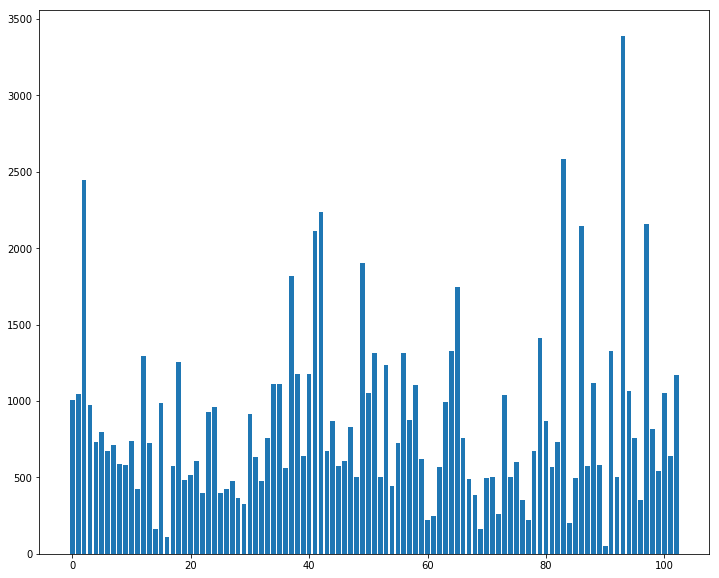

In [6]:
fig,ax = plt.subplots(figsize=(12,10))
plt.bar(list(class_len.keys()),list(class_len.values()))

In [7]:
{k:v for k,v in class_len.items() if v<=300}

{77: 222,
 16: 112,
 60: 221,
 69: 162,
 14: 161,
 72: 260,
 84: 199,
 90: 52,
 61: 250}

Class 90 only has 52 images

In [8]:
{k:v for k,v in class_len.items() if v>=2000}

{97: 2158, 86: 2148, 93: 3388, 42: 2235, 41: 2115, 83: 2584, 2: 2448}

# Clean up invalid images

Code to extract invalid files to csv is in python module.

Remove invalid files:

In [9]:
def get_files(c, extensions=None, recurse=False):
    "Return list of files in `c` that have a suffix in `extensions`. `recurse` determines if we search subfolders."
    return [o for o in Path(c).glob('**/*' if recurse else '*')
            if not o.name.startswith('.') and not o.is_dir()
            and (extensions is None or (o.suffix.lower() in extensions))]


In [33]:
temp=get_files(PATH,'.csv')

In [34]:
invalids=[]
for i in temp:
    invalids+= pd.read_csv(i).loc[:,'0'].tolist()
invalids

['data\\TrainVal\\65\\73112.jpg',
 'data\\TrainVal\\65\\73756.jpg',
 'data\\TrainVal\\93\\104911.jpg',
 'data\\TrainVal\\93\\106196.jpg',
 'data\\TrainVal\\93\\106716.jpg',
 'data\\TrainVal\\93\\106838.jpg',
 'data\\TrainVal\\93\\107044.jpg',
 'data\\TrainVal\\40\\41018.jpg',
 'data\\TrainVal\\40\\41330.jpg',
 'data\\TrainVal\\68\\76949.jpg',
 'data\\TrainVal\\32\\29337.jpg',
 'data\\TrainVal\\32\\29379.jpg',
 'data\\TrainVal\\32\\29405.jpg',
 'data\\TrainVal\\25\\23296.jpg',
 'data\\TrainVal\\37\\35800.jpg',
 'data\\TrainVal\\58\\66127.jpg',
 'data\\TrainVal\\42\\46220.jpg',
 'data\\TrainVal\\98\\113907.jpg',
 'data\\TrainVal\\41\\42456.jpg',
 'data\\TrainVal\\41\\43371.jpg',
 'data\\TrainVal\\83\\89737.jpg',
 'data\\TrainVal\\83\\90980.jpg',
 'data\\TrainVal\\83\\90986.jpg',
 'data\\TrainVal\\83\\91786.jpg',
 'data\\TrainVal\\83\\92373.jpg',
 'data\\TrainVal\\83\\92789.jpg']

In [35]:
invalids2= [i.replace('\\','/') for i in invalids]
invalids2

['data/TrainVal/65/73112.jpg',
 'data/TrainVal/65/73756.jpg',
 'data/TrainVal/93/104911.jpg',
 'data/TrainVal/93/106196.jpg',
 'data/TrainVal/93/106716.jpg',
 'data/TrainVal/93/106838.jpg',
 'data/TrainVal/93/107044.jpg',
 'data/TrainVal/40/41018.jpg',
 'data/TrainVal/40/41330.jpg',
 'data/TrainVal/68/76949.jpg',
 'data/TrainVal/32/29337.jpg',
 'data/TrainVal/32/29379.jpg',
 'data/TrainVal/32/29405.jpg',
 'data/TrainVal/25/23296.jpg',
 'data/TrainVal/37/35800.jpg',
 'data/TrainVal/58/66127.jpg',
 'data/TrainVal/42/46220.jpg',
 'data/TrainVal/98/113907.jpg',
 'data/TrainVal/41/42456.jpg',
 'data/TrainVal/41/43371.jpg',
 'data/TrainVal/83/89737.jpg',
 'data/TrainVal/83/90980.jpg',
 'data/TrainVal/83/90986.jpg',
 'data/TrainVal/83/91786.jpg',
 'data/TrainVal/83/92373.jpg',
 'data/TrainVal/83/92789.jpg']

In [38]:
import os
for i in invalids2:
    os.remove(i)

FileNotFoundError: [Errno 2] No such file or directory: 'data/TrainVal/83/92789.jpg'

# Show images

In [14]:
def show_img_from_list(l,rows,cols,figsize=(12,10),cmap='binary'):
    fig,axes = plt.subplots(rows,cols,figsize=figsize)
    i=0
    for r in range(rows):
        for c in range(cols):
            img = mpimg.imread(l[i])
            axes[r][c].imshow(img)
            axes[r][c].set_axis_off()
            i+=1
    plt.tight_layout()

# Fastai classes

In [2]:
from fastai import *
from fastai.vision import *

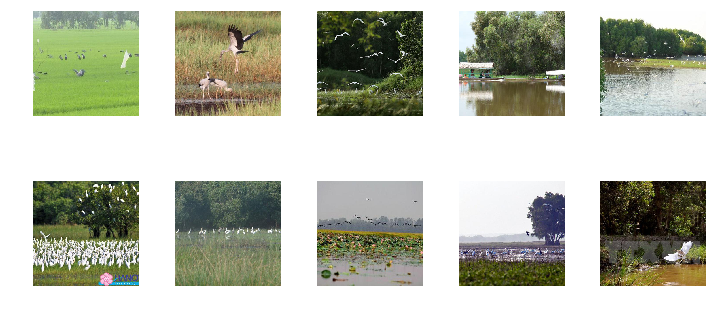

In [15]:
fnames = get_image_files('data/TrainVal/90')
show_img_from_list(fnames,2,5,figsize=(10,5))

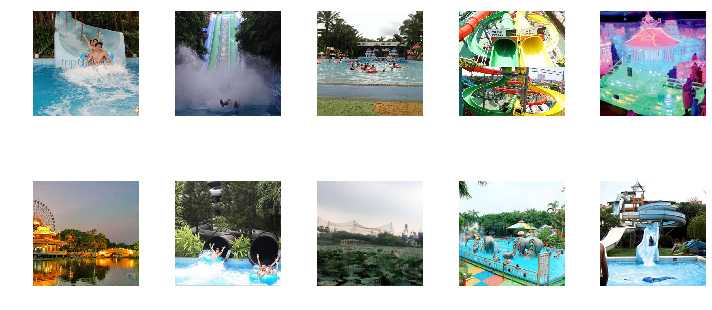

In [31]:
show_img_from_list(get_image_files('data/TrainVal/16')[10:],2,5,figsize=(10,5))

## Image size

In [ ]:
plt.imread(data.train_ds.x[0]).shape[:2]

img_shape=[plt.imread(i).shape[:2] for i in data.train_ds.x[200:1000]]

widths,heights= zip(*img_shape)

plt.scatter(widths,heights)

# Training

In [8]:
PATH = Path('data')
train_path = PATH/'TrainVal'
np.random.seed(1204)
data = ImageDataBunch.from_folder(PATH,train='TrainVal',valid_pct=.15,ds_tfms = get_transforms(),size=224,bs=64).normalize(imagenet_stats)

In [9]:
# Training with resnet34
learn = create_cnn(data, models.resnet34, metrics=error_rate)

(array([322., 123., 160.,  86., ..., 113.,  51., 316., 215.]),
 array([  0.  ,   1.02,   2.04,   3.06, ...,  98.94,  99.96, 100.98, 102.  ]),
 <a list of 100 Patch objects>)

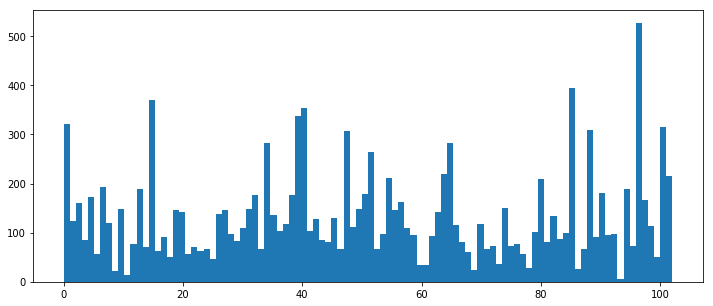

In [9]:
fig,ax = plt.subplots(figsize=(12,5))
plt.hist(data.valid_ds.ds.y,bins=100)

In [10]:
pd.Series(data.valid_ds.ds.y).value_counts().sort_values()[:10]

93     6
11    13
9     22
69    25
86    27
78    29
60    34
61    34
73    37
25    47
dtype: int64

(array([1734.,  614.,  890.,  552., ...,  643.,  298., 1842., 1145.]),
 array([  0.  ,   1.02,   2.04,   3.06, ...,  98.94,  99.96, 100.98, 102.  ]),
 <a list of 100 Patch objects>)

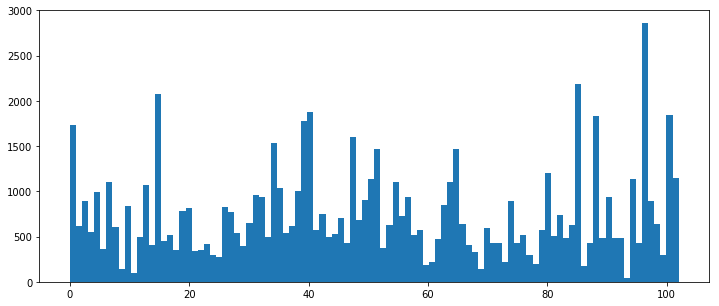

In [11]:
fig,ax = plt.subplots(figsize=(12,5))
plt.hist(data.train_ds.ds.y,bins=100)

In [12]:
pd.Series(data.train_ds.ds.y).value_counts().sort_values()[:10]

93     46
11     99
69    137
9     139
86    172
60    187
78    193
61    216
73    223
25    278
dtype: int64

In [7]:
# Training with resnet34
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


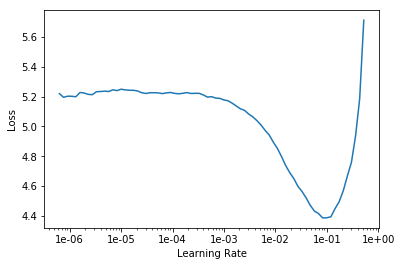

In [15]:
learn.recorder.plot()

In [16]:
# learn.fit_one_cycle(20,max_lr=6e-02)
learn.fit_one_cycle(15,max_lr=4e-02)

Total time: 1:19:49
epoch  train_loss  valid_loss  error_rate
1      1.342064    1.113604    0.312895    (05:32)
2      1.499522    1.268182    0.338173    (05:21)
3      1.697982    1.353000    0.353521    (05:13)
4      2.023931    1.708845    0.407388    (05:24)
5      2.241652    1.951740    0.420027    (05:18)
6      2.218791    1.523477    0.367138    (05:11)
7      2.190417    3.359558    0.369019    (05:15)
8      1.842355    1.403621    0.360969    (05:17)
9      1.570094    1.273482    0.338926    (05:18)
10     1.318260    0.962460    0.269485    (05:20)
11     1.118031    0.813799    0.241122    (05:15)
12     0.916276    0.894896    0.208170    (05:24)
13     0.795232    0.595321    0.176497    (05:19)
14     0.704870    0.556398    0.165964    (05:16)
15     0.697298    0.547696    0.162729    (05:18)



In [17]:
# learn.save('stage1-34')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


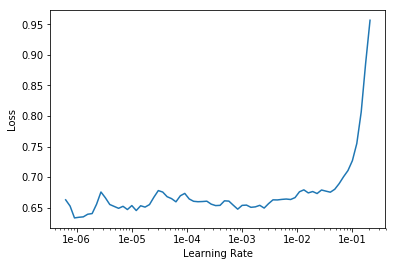

In [18]:
learn.lr_find()

learn.recorder.plot()

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

In [29]:
interp.probs[0].max()

tensor(0.8162)

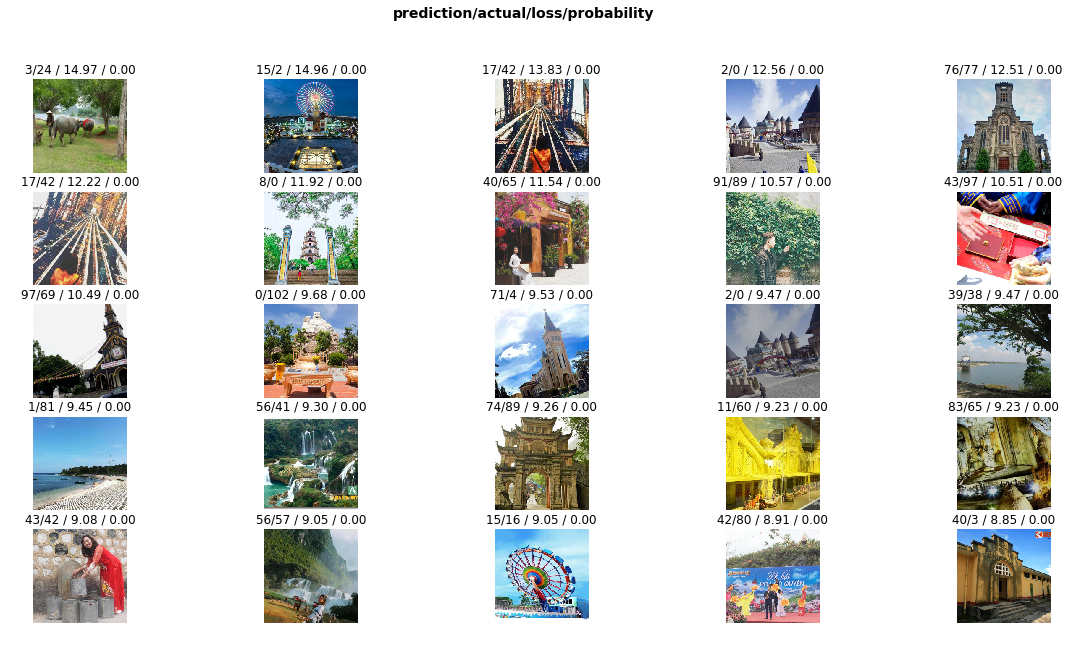

In [20]:
interp.plot_top_losses(25, figsize=(20,10))

In [31]:
interp.most_confused(min_val=2)

[('58', '65', 97),
 ('65', '58', 66),
 ('64', '51', 60),
 ('35', '83', 48),
 ('51', '64', 48),
 ('83', '35', 41),
 ('83', '41', 38),
 ('24', '41', 27),
 ('31', '1', 25),
 ('89', '88', 24),
 ('41', '83', 23),
 ('2', '0', 21),
 ('95', '82', 21),
 ('1', '31', 20),
 ('54', '53', 18),
 ('67', '0', 15),
 ('2', '23', 14),
 ('1', '44', 13),
 ('80', '2', 13),
 ('80', '95', 13),
 ('31', '66', 12),
 ('42', '12', 12),
 ('65', '59', 11),
 ('93', '41', 11),
 ('12', '42', 10),
 ('40', '42', 9),
 ('41', '5', 9),
 ('44', '1', 9),
 ('46', '40', 9),
 ('5', '97', 9),
 ('53', '54', 9),
 ('66', '44', 9),
 ('88', '89', 9),
 ('1', '66', 8),
 ('44', '66', 8),
 ('5', '24', 8),
 ('67', '83', 8),
 ('88', '41', 8),
 ('89', '41', 8),
 ('98', '86', 8),
 ('1', '45', 7),
 ('39', '37', 7),
 ('41', '24', 7),
 ('51', '82', 7),
 ('66', '31', 7),
 ('82', '95', 7),
 ('83', '93', 7),
 ('95', '94', 7),
 ('0', '5', 6),
 ('0', '67', 6),
 ('24', '74', 6),
 ('24', '86', 6),
 ('40', '97', 6),
 ('56', '57', 6),
 ('82', '51', 6),
 (

In [39]:
learn.unfreeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


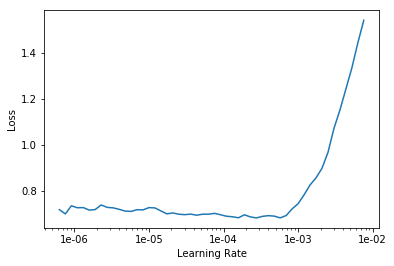

In [40]:
learn.lr_find()

learn.recorder.plot()

In [41]:
learn.unfreeze()

In [42]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,5e-3))

Total time: 30:21
epoch  train_loss  valid_loss  error_rate
1      0.745118    0.558914    0.168899    (06:06)
2      0.711618    0.548252    0.164385    (06:07)
3      0.589164    0.459305    0.141739    (06:01)
4      0.457479    0.404297    0.123608    (06:02)
5      0.408303    0.389591    0.120599    (06:04)



In [43]:
# learn.save('stage2-34')

In [ ]:
learn.load('stage2-34')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


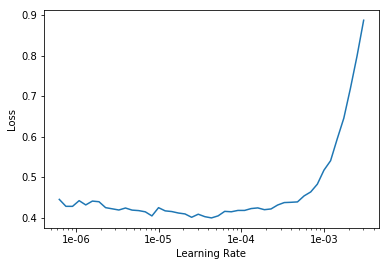

In [12]:
learn.unfreeze()

learn.lr_find()

learn.recorder.plot()

In [13]:
learn.load('stage2-34')

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,3e-4))

Total time: 30:47
epoch  train_loss  valid_loss  error_rate
1      0.427065    0.387929    0.118793    (06:01)
2      0.436463    0.382929    0.117439    (06:06)
3      0.366226    0.367502    0.113903    (06:20)
4      0.376076    0.362219    0.111119    (05:59)
5      0.334489    0.360283    0.109765    (06:19)



In [16]:
# learn.save('stage2-10epochs-34')

In [15]:
learn.load('stage2-10epochs-34')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


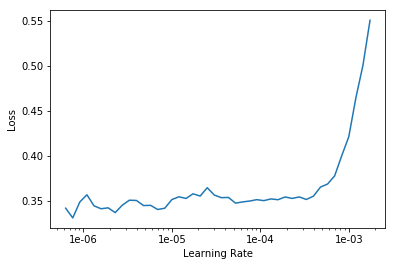

In [13]:
learn.unfreeze()

learn.lr_find()

learn.recorder.plot()

In [ ]:
learn.load('stage2-10epochs-34')

In [16]:
learn.unfreeze()

learn.fit_one_cycle(3,max_lr=slice(7e-7,1e-5))

Total time: 19:03
epoch  train_loss  valid_loss  error_rate
1      0.354347    0.361867    0.109239    (06:21)
2      0.357462    0.359493    0.109765    (06:20)
3      0.340920    0.357808    0.109765    (06:21)



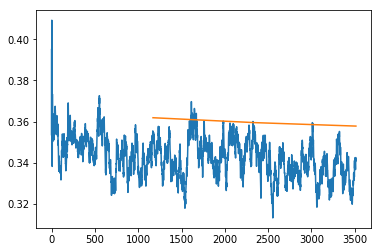

In [20]:
learn.recorder.plot_losses()

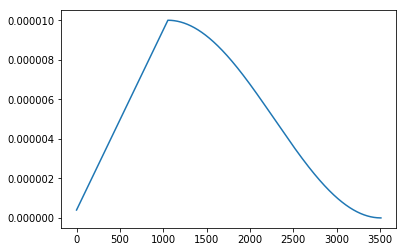

In [19]:
learn.recorder.plot_lr()

# increase image size

In [4]:
PATH = Path('data')
train_path = PATH/'TrainVal'
np.random.seed(1204)
data = ImageDataBunch.from_folder(PATH,train='TrainVal',valid_pct=.15,ds_tfms = get_transforms(),size=224,bs=64).normalize(imagenet_stats)

In [5]:
# Training with resnet34
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [22]:
learn.load('stage2-10epochs-34')

In [6]:
data = ImageDataBunch.from_folder(PATH,train='TrainVal',valid_pct=.15,ds_tfms = get_transforms(),size=299,bs=64).normalize(imagenet_stats)
learn.data = data

In [ ]:
learn.freeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


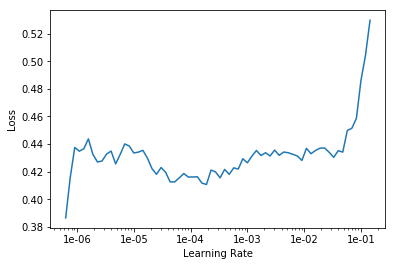

In [24]:
learn.lr_find()

learn.recorder.plot()

In [25]:
learn.freeze()
learn.fit_one_cycle(5,max_lr=3e-05)

Total time: 41:11
epoch  train_loss  valid_loss  error_rate
1      0.428451    0.273545    0.089028    (08:08)
2      0.425683    0.271876    0.087272    (08:14)
3      0.417090    0.268553    0.086661    (08:24)
4      0.425432    0.269004    0.086661    (08:20)
5      0.418996    0.269497    0.087577    (08:04)



In [26]:
# learn.save('stage1-299-5epochs-34')

In [7]:
learn.load('stage1-299-5epochs-34')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


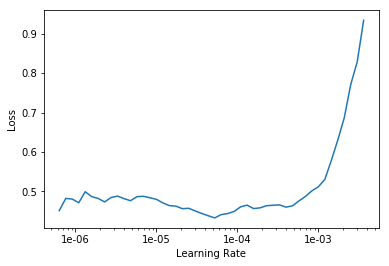

In [32]:
learn.unfreeze()

learn.lr_find()

learn.recorder.plot()

In [34]:
learn.unfreeze()

learn.fit_one_cycle(3,max_lr=slice(1e-6,3e-5))

Total time: 28:27
epoch  train_loss  valid_loss  error_rate
1      0.414778    0.260030    0.082691    (09:52)
2      0.400595    0.256923    0.083225    (09:27)
3      0.386926    0.256165    0.082309    (09:07)



In [8]:
# learn.save('stage2-299-3epochs-34')
learn.load('stage2-299-3epochs-34')


# Increase img size again

In [125]:
PATH = Path('data')
train_path = PATH/'TrainVal'
np.random.seed(1204)
data = ImageDataBunch.from_folder(PATH,train='TrainVal',valid_pct=.15,test = 'Public',ds_tfms = get_transforms(),size=299,bs=64).normalize(imagenet_stats)

In [133]:
# Training with resnet34
learn = create_cnn(data, models.resnet34, metrics=error_rate)

learn.load('stage2-299-3epochs-34')

In [134]:
data = ImageDataBunch.from_folder(PATH,train='TrainVal',valid_pct=.15,test = 'Public',ds_tfms = get_transforms(),size=350,bs=64).normalize(imagenet_stats)
learn.data = data

In [135]:
learn.freeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


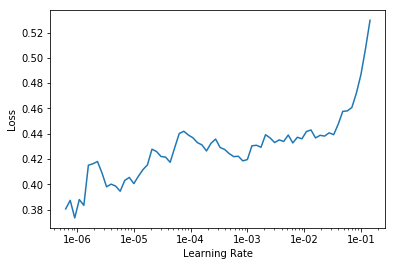

In [136]:
learn.lr_find()

learn.recorder.plot()

In [137]:
learn.freeze()
learn.fit_one_cycle(5,max_lr=3e-04)

Total time: 47:07
epoch  train_loss  valid_loss  error_rate
1      0.411489    0.255868    0.084027    (09:39)
2      0.414010    0.252609    0.082227    (09:17)
3      0.409670    0.248856    0.081852    (09:20)
4      0.397898    0.247948    0.081702    (08:52)
5      0.397661    0.247562    0.081852    (09:57)



In [142]:
# learn.save('stage1-350-5epochs-34')
learn.load('stage1-350-5epochs-34')


LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


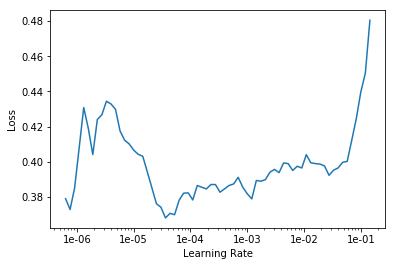

In [143]:
learn.freeze()

learn.lr_find()

learn.recorder.plot()

In [144]:
learn.freeze()
learn.fit_one_cycle(6,max_lr=3e-04)

Total time: 54:31
epoch  train_loss  valid_loss  error_rate
1      0.408981    0.246911    0.081627    (09:32)
2      0.384166    0.246155    0.081702    (08:49)
3      0.394794    0.246207    0.081852    (09:29)
4      0.395556    0.245272    0.081852    (08:45)
5      0.383672    0.244877    0.081101    (09:03)
6      0.386593    0.244149    0.080426    (08:51)



In [147]:
# learn.save('stage1-350-11epochs-34')
learn.load('stage1-350-11epochs-34')


LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


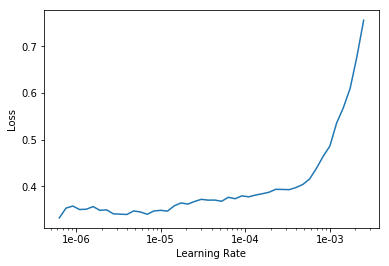

In [146]:
learn.unfreeze()

learn.lr_find()

learn.recorder.plot()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


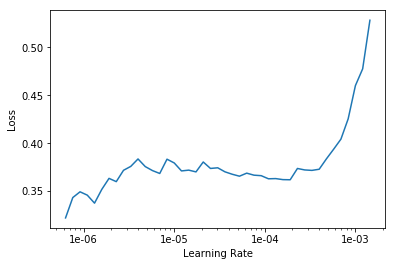

In [148]:
learn.unfreeze()

learn.lr_find()

learn.recorder.plot()

In [149]:
learn.unfreeze()

learn.fit_one_cycle(5,max_lr=slice(1e-06,6e-05))

Total time: 56:53
epoch  train_loss  valid_loss  error_rate
1      0.388037    0.245481    0.081476    (11:23)
2      0.390521    0.245484    0.080051    (11:34)
3      0.372345    0.242634    0.079376    (11:27)
4      0.357147    0.239970    0.079526    (11:11)
5      0.346038    0.238251    0.077875    (11:17)



In [150]:
# learn.save('stage2-350-5epochs-34')
learn.load('stage2-350-5epochs-34')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


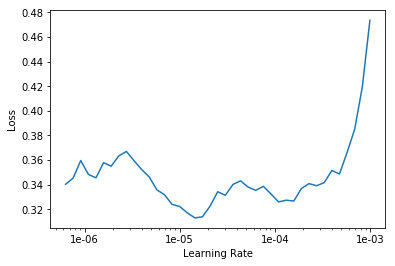

In [152]:
learn.unfreeze()

learn.lr_find()

learn.recorder.plot()

In [153]:
learn.unfreeze()

learn.fit_one_cycle(6,max_lr=slice(1e-06,6e-05))

Total time: 1:08:38
epoch  train_loss  valid_loss  error_rate
1      0.332970    0.240848    0.080351    (11:39)
2      0.361341    0.241010    0.080351    (11:20)
3      0.377108    0.237880    0.079001    (11:10)
4      0.348496    0.235387    0.077500    (11:05)
5      0.329455    0.234036    0.078851    (11:34)
6      0.344141    0.233187    0.077575    (11:47)



In [154]:
# learn.save('stage2-350-11epochs-34')
learn.load('stage2-350-11epochs-34')

# Prediction + Submission

In [155]:
data = ImageDataBunch.from_folder(PATH,train='TrainVal',valid_pct=.15,test = 'Public', ds_tfms = get_transforms(),size=350,bs=64).normalize(imagenet_stats)
learn.data = data

In [156]:
learn.load('stage2-350-11epochs-34')

In [157]:
results = learn.TTA(with_loss=True,ds_type = DatasetType.Test)

Total time: 11:26



## Create csv

In [158]:
fnames = data.test_ds.ds.x

In [159]:
fnames

array([PosixPath('data/Public/1159778.jpg'), PosixPath('data/Public/1854995.jpg'),
       PosixPath('data/Public/1688931.jpg'), PosixPath('data/Public/1163222.jpg'), ...,
       PosixPath('data/Public/1592306.jpg'), PosixPath('data/Public/1902057.jpg'),
       PosixPath('data/Public/1752585.jpg'), PosixPath('data/Public/1919914.jpg')], dtype=object)

In [160]:
fnames = [int(str(i).split('/')[-1][:-4]) for i in fnames]

In [161]:
fnames[:5]

[1159778, 1854995, 1688931, 1163222, 1472336]

In [162]:
preds = to_np(results[0])
preds.shape

(14356, 103)

In [163]:
preds_sort = np.argsort(preds,axis=-1)

In [63]:
# preds_sort

array([[ 9, 68, 33, 54, ..., 21, 36, 98, 37],
       [ 9, 73, 61,  6, ..., 98, 10, 82, 23],
       [ 6,  3, 71, 54, ..., 90, 39, 52, 53],
       [73, 37, 61, 24, ..., 85, 48,  0, 67],
       ...,
       [61, 29, 24, 25, ..., 48, 90, 57, 65],
       [61, 81, 73, 52, ..., 60, 47, 15, 35],
       [68, 76, 80, 60, ...,  5, 85, 53, 26],
       [ 9, 61, 54, 74, ..., 65, 26, 58, 69]])

In [64]:
# preds_sort[:,-3:]

array([[36, 98, 37],
       [10, 82, 23],
       [39, 52, 53],
       [48,  0, 67],
       ...,
       [90, 57, 65],
       [47, 15, 35],
       [85, 53, 26],
       [26, 58, 69]])

In [164]:
preds_top3=(preds_sort[:,-3:])[:,::-1]

In [165]:
np.sort(preds,axis=-1)[:,-3:][:,::-1]

array([[9.118253e-01, 2.348906e-02, 1.543225e-02],
       [7.061039e-01, 9.056991e-02, 3.348722e-02],
       [5.699701e-01, 2.638344e-01, 1.158534e-01],
       [6.711410e-01, 1.579006e-01, 1.369230e-01],
       ...,
       [5.862325e-01, 4.137528e-01, 9.608845e-06],
       [9.534771e-01, 3.988758e-02, 2.726402e-03],
       [9.994909e-01, 3.498463e-04, 7.009683e-05],
       [9.819338e-01, 1.182081e-02, 2.269372e-03]], dtype=float32)

In [166]:
subm = pd.DataFrame(preds_top3,columns=list('abc'))

In [167]:
subm.head()

,a,b,c
0,37,98,36
1,23,63,65
2,53,52,39
3,67,48,0
4,45,15,1


In [168]:
idx2class = {k:v for k,v in enumerate(data.classes)}

In [169]:
subm = subm.replace(idx2class)

In [170]:
subm['predicted'] = subm.a + ' ' + subm.b + ' ' + subm.c

In [171]:
subm['id'] = fnames

In [172]:
subm.head()

,a,b,c,predicted,id
0,4,95,39,4 95 39,1159778
1,27,63,65,27 63 65,1854995
2,54,53,41,54 53 41,1688931
3,67,5,0,67 5 0,1163222
4,47,2,1,47 2 1,1472336


In [173]:
final_subm = subm.sort_values('id').loc[:,['id','predicted']].reset_index(drop='True')
final_subm.head()

,id,predicted
0,1000076,98 86 97
1,1000082,27 61 9
2,1000268,2 47 71
3,1000348,56 57 88
4,1000450,40 46 42


In [174]:
final_subm.to_csv(PATH/'submission350.csv',header=True,index=False)

In [175]:
final_subm.shape

# LB: 0.026, <100 epochs

(14356, 2)